# Table of Contents
<a id="toc"></a>
- [1. Project Description](#1)
- [2. Import Necssaries Libraries](#2)
- [3. EDA](#3)
- [4. Feature Engineering](#4)
- [5. Assigning Feature and target variables](#5)
- [6. Feature Scaling](#6)
- [7. Spliting the data into Training and Testing Data](#7)
- [8. Modeling](#8)
    - [8.1 Logistic Regression](#8.1)
    - [8.2 Random Forest](#8.2)
    - [8.3 KNN](#8.3)
    - [8.4 Bagging](#8.4)
    - [8.5 Gradient Boosting](#8.5)
    - [8.6 Decision Tree](#8.6)
    - [8.7 SVM](#8.7)
- [9. TP, TN, FP, FN](#9)
    - [9.1 Logistic Regression](#9.1)
    - [9.2 Random Forest](#9.2)
    - [9.3 KNN](#9.3)
    - [9.4 Bagging](#9.4)
    - [9.5 Gradient Boosting](#9.5)
    - [9.6 Decision Tree](#9.6)
    - [9.7 SVM](#9.7)
- [10. Auto Machine Learning](#10)

<a id='2'></a>
# Import Necessaries Libraries

In [114]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import mglearn

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import  confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from tpot import TPOTClassifier

import warnings
warnings.filterwarnings("ignore")

<a id='3'></a>
# EDA

In [115]:
df = pd.read_csv('gender_voice_dataset.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [116]:
df.nunique()

meanfreq    3166
sd          3166
median      3077
Q25         3103
Q75         3034
IQR         3068
skew        3166
kurt        3166
sp.ent      3166
sfm         3166
mode        2825
centroid    3166
meanfun     3166
minfun       913
maxfun       123
meandom     2999
mindom        77
maxdom      1054
dfrange     1091
modindx     3079
label          2
dtype: int64

In [ ]:
"""
1 target variable: label (male or female)
20 independent variables:
meanfreq: mean frequency of the voice audio of the person (in kHz)
sd: standard deviation of the frequency of the voice audio
median: median frequency of the voice audio (in kHz)
Q25: first quantile (in kHz)
Q75: third quantile (in kHz)
IQR: interquantile range (in kHz)
skew: Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution
kurt: Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution.
sp.ent: spectral entropy
sfm: spectral flatness
mode: mode frequency
centroid: frequency centroid (see specprop)
meanfun: mean fundamental frequency measured across acoustic signal
minfun: minimum fundamental frequency measured across acoustic signal
maxfun: maximum fundamental frequency measured across acoustic signal
meandom: mean of dominant frequency measured across acoustic signal
mindom: minimum of dominant frequency measured across acoustic signal
maxdom: maximum of dominant frequency measured across acoustic signal
dfrange: range of dominant frequency measured across acoustic signal
modindx: modulation index
"""

In [7]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [8]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


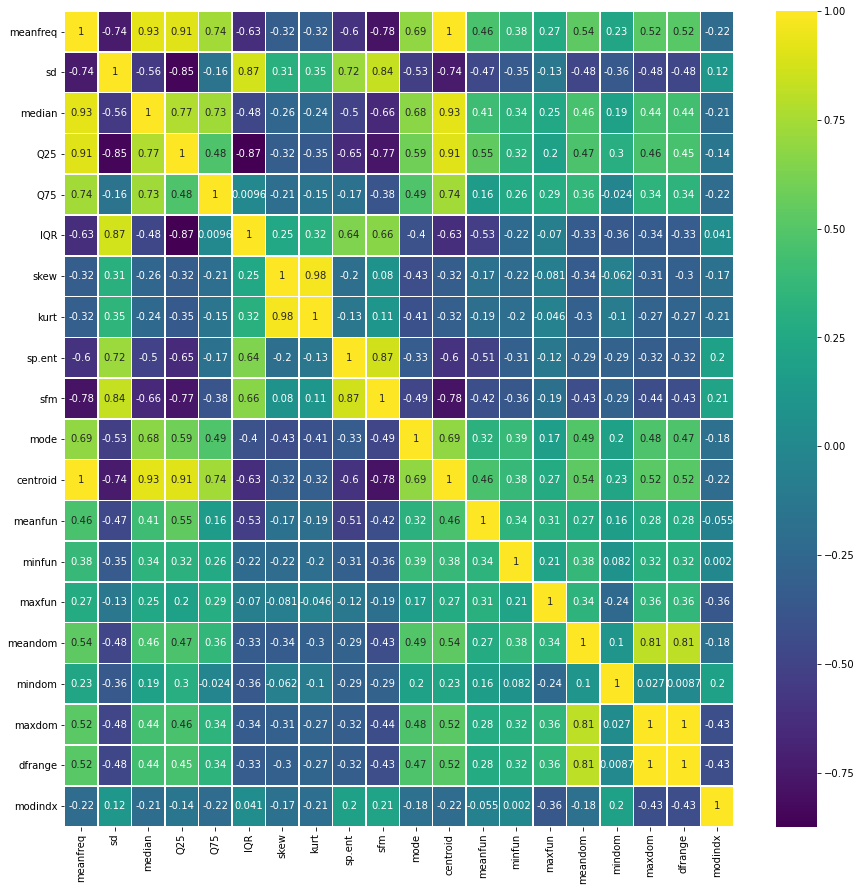

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=.5);

 from here we can see that alot of columns are directly or inversely correlated with some<br>
 other columns having correlation value as high as 0.98<br>
 Hence we will be removing some columns that don't help the model in learning or generalizing over the data.<br>

In [12]:
df.groupby('label').mean()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
label,,,,,,,,,,,,,,,,,,,,
female,0.191000,0.049142,0.195942,0.165349,0.223184,0.057834,2.984875,24.805224,0.873066,0.344763,0.178541,0.191000,0.169742,0.039429,0.263848,0.929544,0.064987,5.736107,5.671120,0.170073
male,0.170813,0.065110,0.175299,0.115562,0.226346,0.110784,3.295460,48.331698,0.917188,0.471670,0.152022,0.170813,0.115872,0.034175,0.253836,0.728877,0.040307,4.358447,4.318139,0.177430


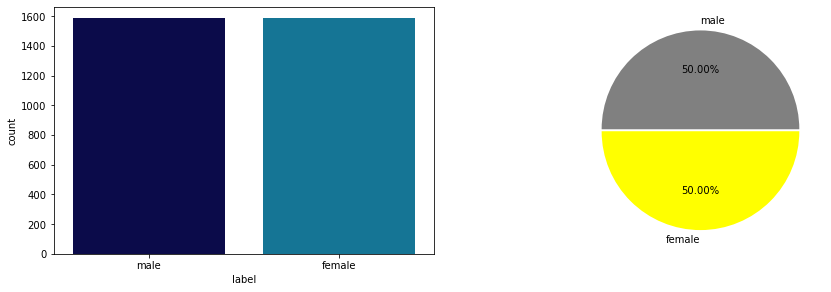

In [18]:
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
sns.countplot(x=df['label'], palette='ocean')

plt.subplot(2,2,2)
male = df.label[df['label'] == 'male'].count()
female = df.label[df['label'] == 'female'].count()
plt.pie([male, female], labels=['male', 'female'], autopct='%.2f%%', explode=[0.01,0.01], colors=['grey', 'yellow'])
plt.show()

There is no case of imbalance class, meaning one class doesn't dominate in the dataset.

In [30]:
male = gen.loc[gen['label']=='male']
female = gen.loc[gen['label']=='female']

In [32]:
male.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [33]:
female.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1584,0.158108,0.082782,0.191191,0.062350,0.224552,0.162202,2.801344,19.929617,0.952161,0.679223,...,0.158108,0.185042,0.023022,0.275862,0.272964,0.046875,0.742188,0.695312,0.339888,female
1585,0.182855,0.067789,0.200639,0.175489,0.226068,0.050579,3.001890,19.865482,0.910458,0.506099,...,0.182855,0.159590,0.018713,0.266667,0.258970,0.054688,0.804688,0.750000,0.269231,female
1586,0.199807,0.061974,0.211358,0.184422,0.235687,0.051265,2.543841,14.921964,0.904432,0.425289,...,0.199807,0.156465,0.016194,0.266667,0.250446,0.054688,0.898438,0.843750,0.329521,female
1587,0.195280,0.072087,0.204656,0.180611,0.255954,0.075344,2.392326,10.061489,0.907115,0.524209,...,0.195280,0.182629,0.024922,0.275862,0.269531,0.054688,0.703125,0.648438,0.294717,female
1588,0.208504,0.057550,0.220229,0.190343,0.249759,0.059416,1.707786,5.670912,0.879674,0.343548,...,0.208504,0.162043,0.016807,0.262295,0.260789,0.054688,0.812500,0.757812,0.251546,female


In [36]:
FEATURES = [col for col in df.columns if col not in ['label']]
FEATURES

['meanfreq',
 'sd',
 'median',
 'Q25',
 'Q75',
 'IQR',
 'skew',
 'kurt',
 'sp.ent',
 'sfm',
 'mode',
 'centroid',
 'meanfun',
 'minfun',
 'maxfun',
 'meandom',
 'mindom',
 'maxdom',
 'dfrange',
 'modindx']

Male -> green
Female -> Red


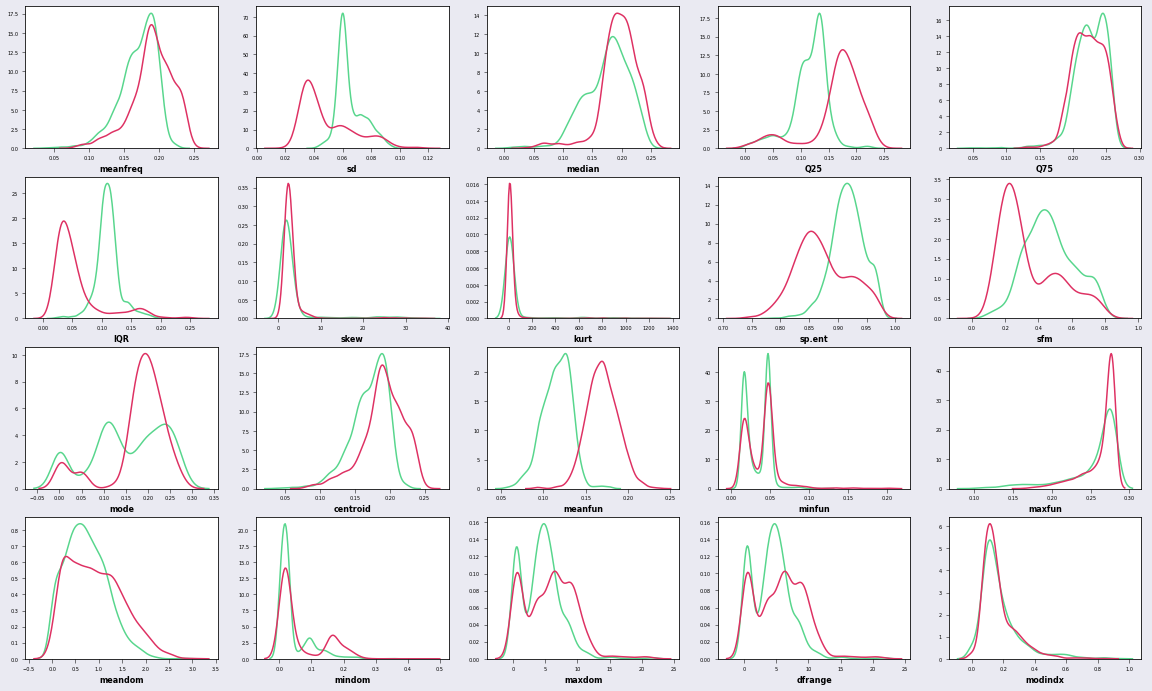

In [57]:
ncols = 5
nrows = 4

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 12), facecolor='#EAEAF2')
print("Male -> green\nFemale -> Red")
for r in range(nrows):
    for c in range(ncols):
        col = FEATURES[r*ncols+c]
        sns.kdeplot(x=male[col], ax=axes[r, c], color='#58D68D')
        sns.kdeplot(x=female[col], ax=axes[r, c], color='#DE3163')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=8, fontweight='bold')
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

Male -> green
Female -> Red


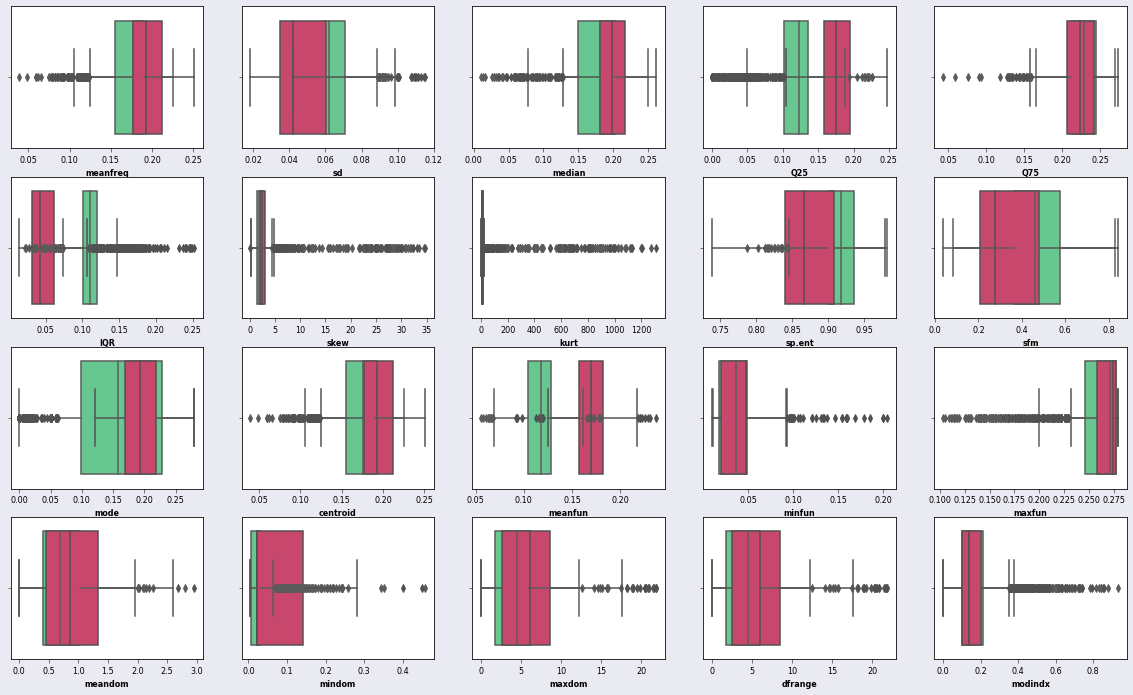

In [55]:
ncols = 5
nrows = 4

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 12), facecolor='#EAEAF2')
print("Male -> green\nFemale -> Red")

for r in range(nrows):
    for c in range(ncols):
        col = FEATURES[r*ncols+c]
        sns.boxplot(x=male[col], ax=axes[r, c], color='#58D68D')
        sns.boxplot(x=female[col], ax=axes[r, c], color='#DE3163')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=8, fontweight='bold')
        axes[r, c].tick_params(labelsize=8, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(6)
plt.show()

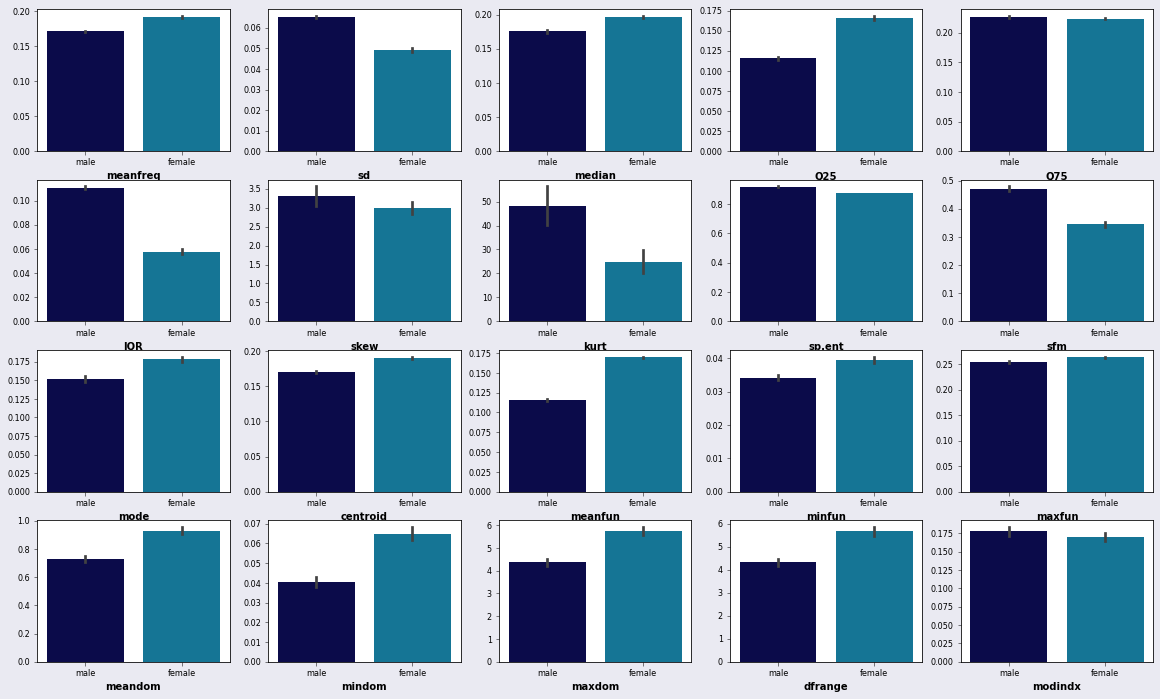

In [53]:
ncols = 5
nrows = 4

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 12), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = FEATURES[r*ncols+c]
        sns.barplot(x=df.label, y=df[col], ax=axes[r, c], palette='ocean')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=10, fontweight='bold')
        axes[r, c].tick_params(labelsize=8, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(6)
plt.show()

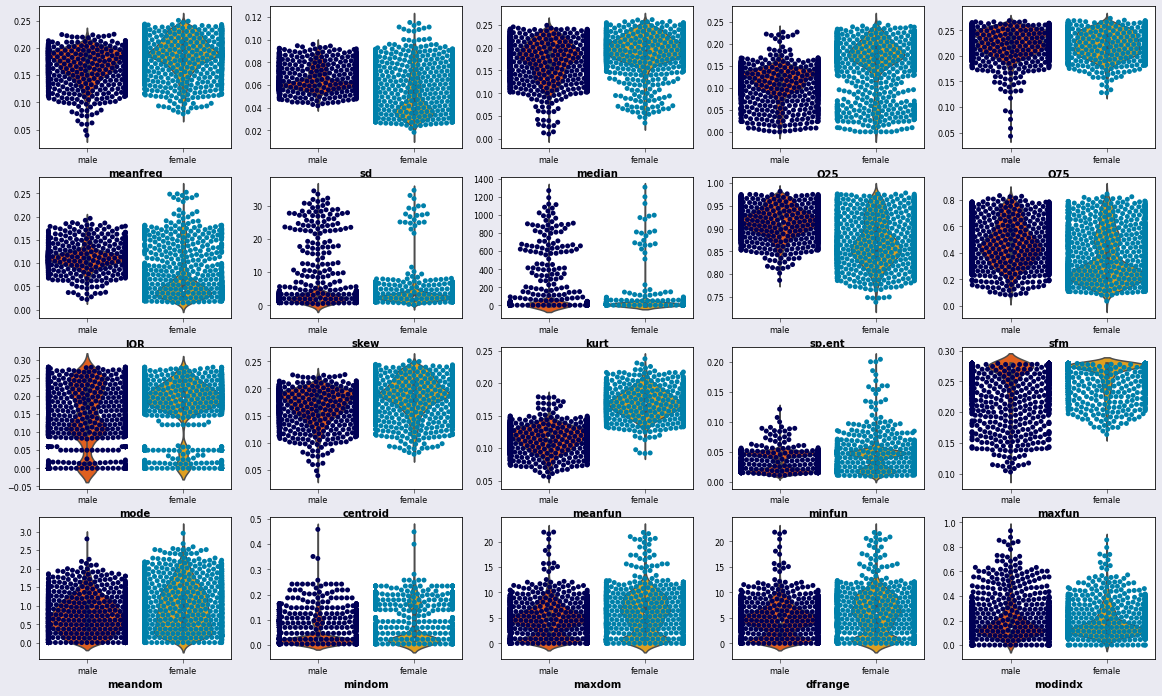

In [60]:
ncols = 5
nrows = 4

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 12), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = FEATURES[r*ncols+c]
        sns.violinplot(x=df.label, y=df[col], ax=axes[r, c], palette='autumn')
        sns.swarmplot(x=df.label, y=df[col], ax=axes[r, c], palette='ocean')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=10, fontweight='bold')
        axes[r, c].tick_params(labelsize=8, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(6)
plt.show()

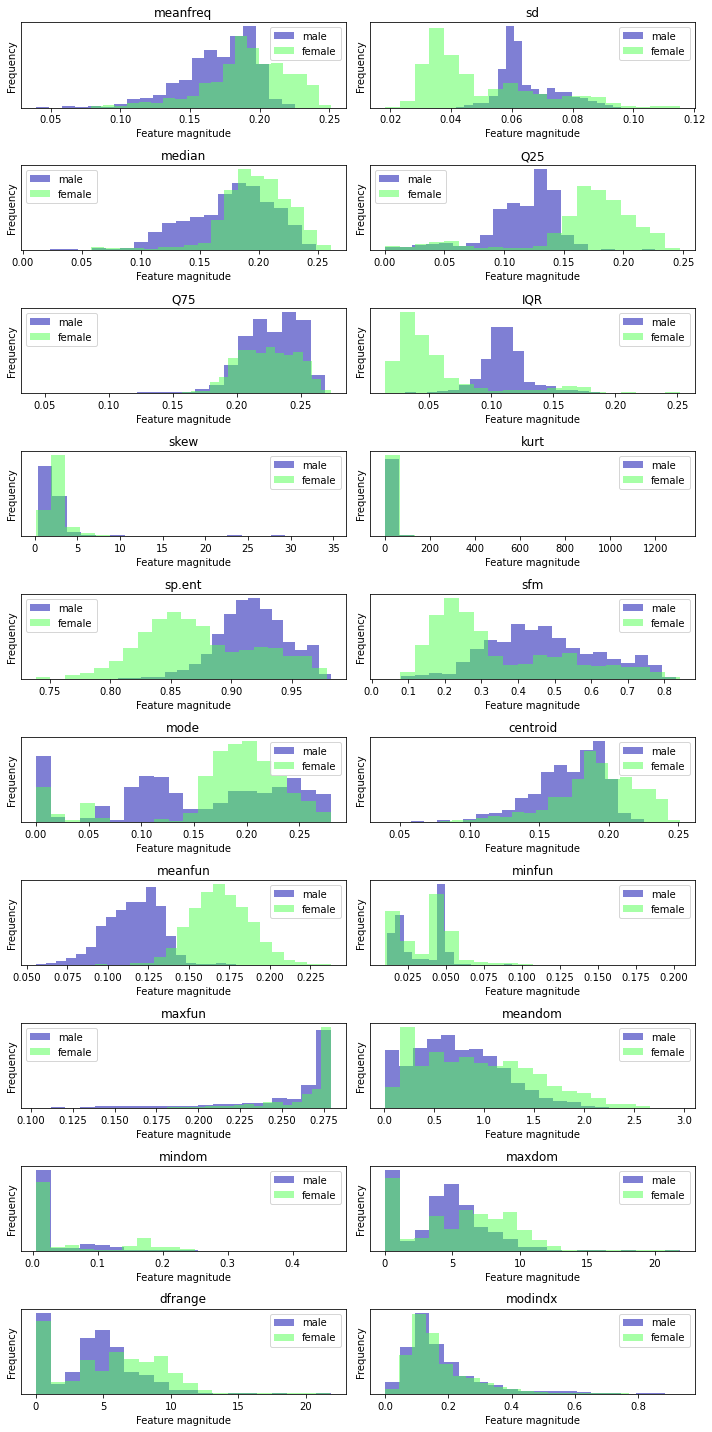

In [82]:
#Plot the histograms
male = df.loc[df['label']=='male']
female = df.loc[df['label']=='female']
fig, axes = plt.subplots(10, 2, figsize=(10,20))
ax = axes.ravel()
for i in range(20):
    ax[i].hist(male.iloc[:,i], bins=20, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(female.iloc[:, i], bins=20, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(list(male)[i])
    ax[i].set_yticks(())
    ax[i].set_xlabel("Feature magnitude")
    ax[i].set_ylabel("Frequency")
    ax[i].legend(["male", "female"], loc="best")

fig.tight_layout()

<a id='4'></a>
# Feature Engineering

In [117]:
df["mean"] = df[FEATURES].mean(axis=1)
df["std"] = df[FEATURES].std(axis=1)
df["min"] = df[FEATURES].min(axis=1)
df["max"] = df[FEATURES].max(axis=1)
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meandom,mindom,maxdom,dfrange,modindx,label,mean,std,min,max
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.007812,0.007812,0.007812,0.000000,0.000000,male,14.472358,61.247810,0.000000,274.402905
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.009014,0.007812,0.054688,0.046875,0.052632,male,32.970636,141.699731,0.000000,634.613855
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.007990,0.007812,0.015625,0.007812,0.046512,male,52.901022,228.893623,0.000000,1024.927705
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.201497,0.007812,0.562500,0.554688,0.247119,male,0.503171,0.926435,0.007812,4.177296
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.712812,0.007812,5.484375,5.476562,0.208274,male,1.023032,1.798535,0.007812,5.484375


<a id='5'></a>
# Assign Feature and target Variables

In [118]:
X = df.drop(['label'], axis = 1)
y = df['label']

In [119]:
y = y.replace(to_replace=['male', 'female'], value=[0,1])
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

<a id='6'></a>
# Features Scaling

In [120]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale

array([[-4.04924806,  0.42735532, -4.22490078, ...,  1.74961506,
        -1.74236628,  1.75945048],
       [-3.84105326,  0.61166951, -3.99929342, ...,  4.43117323,
        -1.74236628,  4.43275115],
       [-3.46306646,  1.60384791, -4.09585051, ...,  7.3374493 ,
        -1.74236628,  7.32946008],
       ...,
       [-1.29877325,  2.32272353, -0.05197278, ..., -0.23793635,
        -1.03518161, -0.22801168],
       [-1.2452018 ,  2.012196  , -0.01772848, ..., -0.2420035 ,
        -1.03518161, -0.23703778],
       [-0.51474626,  2.14765111, -0.07087874, ..., -0.24950527,
        -1.03518161, -0.23421154]])

<a id='7'></a>
# Splitting Training and Testing datasets

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3, random_state=0)

<a id='8'></a>
# Modeling

In [122]:
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def conf_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt='d');
    
def class_report(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
def roc(model, model_name):
    y_pred_svm = model.decision_function(X_test)
    svm_fpr, svm_tpr, _ = roc_curve(y_test, y_pred_svm)
    auc_svm = auc(svm_fpr, svm_tpr)
    plt.figure(figsize=(5, 5), dpi=100)
    plt.plot(svm_fpr, svm_tpr, color="darkorange", label=f'{model_name} (auc = %0.3f)' % auc_svm)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel('False Positive Rate -->')
    plt.ylabel('True Positive Rate -->')
    plt.legend()
    plt.show()

<a id='8.1'></a>
## Logistic Regression

In [123]:
lr_model = LogisticRegression()
kfolds(lr_model, "Logistic Regression")
train(lr_model, "Logistic Regression")

Logistic Regression score on cross validation: 76.85790440442439%
Logistic Regression model score on Training data: 97.33874605322508%
Logistic Regression model score on Testing data: 97.68664563617246%


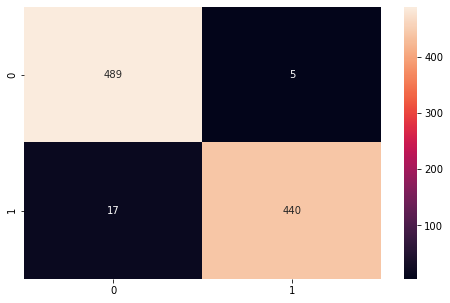

In [124]:
conf_matrix(lr_model)

In [125]:
class_report(lr_model)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       494
           1       0.99      0.96      0.98       457

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



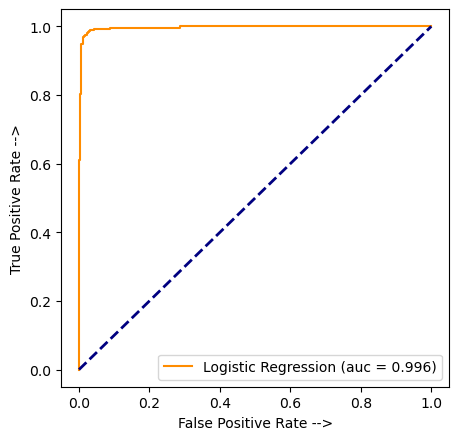

In [126]:
roc(lr_model, "Logistic Regression")

<a id='8.2'></a>
## Random Forest

In [160]:
rf_model = RandomForestClassifier(n_estimators=40, random_state=40)
kfolds(rf_model, "Random Forest")
train(rf_model, "Random Forest")

Random Forest score on cross validation: 96.811184762209%
Random Forest model score on Training data: 100.0%
Random Forest model score on Testing data: 98.63301787592007%


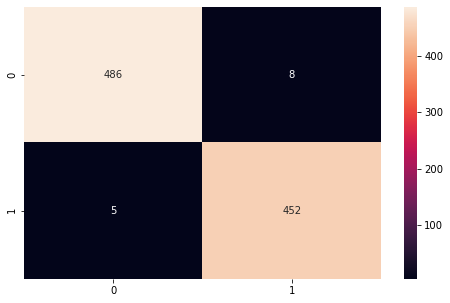

In [161]:
conf_matrix(rf_model)

In [162]:
class_report(rf_model)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       494
           1       0.98      0.99      0.99       457

    accuracy                           0.99       951
   macro avg       0.99      0.99      0.99       951
weighted avg       0.99      0.99      0.99       951



<a id='8.3'></a>
## KNN

In [187]:
knn_model = KNeighborsClassifier(n_neighbors=5)
kfolds(knn_model, "KNN")
train(knn_model, "KNN")

KNN score on cross validation: 67.7692369125105%
KNN model score on Training data: 98.46639603067207%
KNN model score on Testing data: 97.89695057833859%


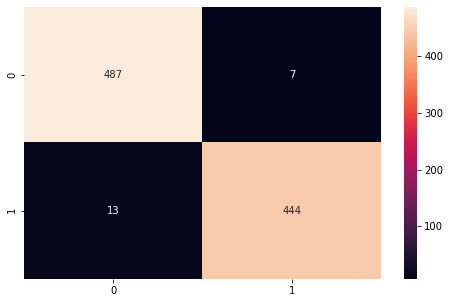

In [188]:
conf_matrix(knn_model)

In [189]:
class_report(knn_model)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       494
           1       0.98      0.97      0.98       457

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



<a id='8.4'></a>
## Bagging

In [196]:
bagg_model = BaggingClassifier(n_estimators=20)
kfolds(bagg_model, "Bagging")
train(bagg_model, "Bagging")

Bagging score on cross validation: 96.4328355229006%
Bagging model score on Training data: 100.0%
Bagging model score on Testing data: 97.79179810725552%


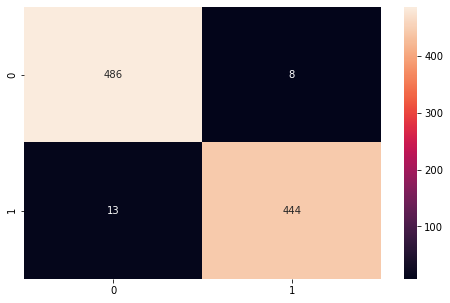

In [197]:
conf_matrix(bagg_model)

In [200]:
class_report(bagg_model)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       494
           1       0.98      0.97      0.98       457

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



<a id='8.5'></a>
## Gradient Boosting

In [208]:
gb_model = GradientBoostingClassifier(n_estimators=80)
kfolds(gb_model, "Boosting")
train(gb_model, "Boosting")

Boosting score on cross validation: 96.96931278201492%
Boosting model score on Training data: 99.3234100135318%
Boosting model score on Testing data: 97.89695057833859%


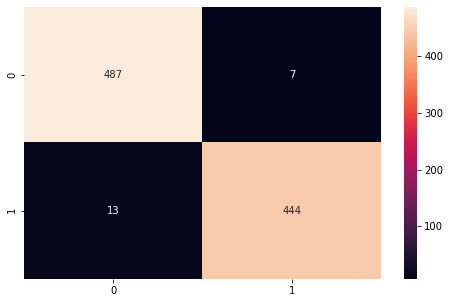

In [209]:
conf_matrix(gb_model)

In [210]:
class_report(gb_model)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       494
           1       0.98      0.97      0.98       457

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



<a id='8.6'></a>
## Decision Tree

In [213]:
dt_model = DecisionTreeClassifier()
kfolds(dt_model, "Decision Tree")
train(dt_model, "Decision Tree")

Decision Tree score on cross validation: 95.38972966497624%
Decision Tree model score on Training data: 100.0%
Decision Tree model score on Testing data: 95.68874868559412%


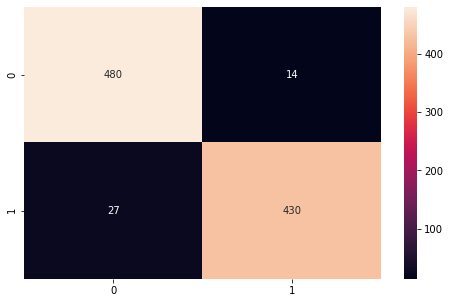

In [214]:
conf_matrix(dt_model)

In [215]:
class_report(dt_model)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       494
           1       0.97      0.94      0.95       457

    accuracy                           0.96       951
   macro avg       0.96      0.96      0.96       951
weighted avg       0.96      0.96      0.96       951



<a id='8.7'></a>
## SVM

In [218]:
svm_model = SVC()
kfolds(svm_model, "SVM")
train(svm_model, "SVM")

SVM score on cross validation: 64.29830691211117%
SVM model score on Training data: 98.37618403247632%
SVM model score on Testing data: 98.52786540483702%


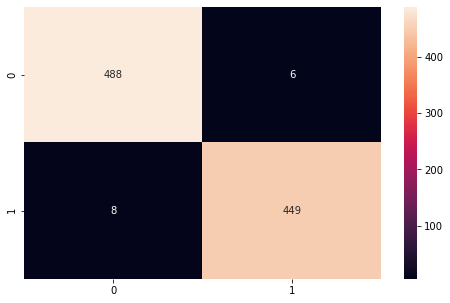

In [219]:
conf_matrix(svm_model)

In [220]:
class_report(svm_model)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       494
           1       0.99      0.98      0.98       457

    accuracy                           0.99       951
   macro avg       0.99      0.99      0.99       951
weighted avg       0.99      0.99      0.99       951



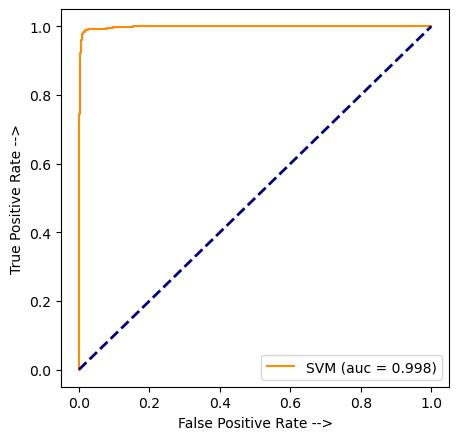

In [221]:
roc(svm_model, "SVM")

<a id='9'></a>
# TP, TN, FP, FN

In [222]:
def tp(model, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    ACC = (TP+TN)/(TP+FP+FN+TN)
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP) 
    PPV = TP/(TP+FP)
    NPV = TN/(TN+FN)
    FPR = FP/(FP+TN)
    FNR = FN/(TP+FN)
    FDR = FP/(TP+FP)

    print(f"TP, FN, TP, FP Overall Accuarcy of {model_name}: {ACC*100}%")
    print(f"Sensitivity Accuarcy of {model_name}: {TPR * 100}%")
    print(f"Specificity Negative Rate Accuarcy of {model_name}: {TNR * 100}%")
    print(f"Negative predictive value Accuarcy of {model_name}: {NPV * 100}%")
    print(f"Fall out Accuarcy of {model_name}: {FPR * 100}%")
    print(f"False negative rate Accuarcy of {model_name}: {FNR * 100}%")
    print(f"False discovery rate Accuarcy of {model_name}: {FDR * 100}%")

<a id='9.1'></a>
## Logistic Regression

In [224]:
tp(lr_model, "Logistic Regression")

TP, FN, TP, FP Overall Accuarcy of Logistic Regression: 97.68664563617246%
Sensitivity Accuarcy of Logistic Regression: 96.2800875273523%
Specificity Negative Rate Accuarcy of Logistic Regression: 98.98785425101214%
Negative predictive value Accuarcy of Logistic Regression: 96.6403162055336%
Fall out Accuarcy of Logistic Regression: 1.0121457489878543%
False negative rate Accuarcy of Logistic Regression: 3.7199124726477026%
False discovery rate Accuarcy of Logistic Regression: 1.1235955056179776%


<a id='9.1'></a>
## Random Forest

In [225]:
tp(rf_model, "Random Forest")

TP, FN, TP, FP Overall Accuarcy of Random Forest: 98.63301787592007%
Sensitivity Accuarcy of Random Forest: 98.90590809628009%
Specificity Negative Rate Accuarcy of Random Forest: 98.38056680161942%
Negative predictive value Accuarcy of Random Forest: 98.98167006109979%
Fall out Accuarcy of Random Forest: 1.6194331983805668%
False negative rate Accuarcy of Random Forest: 1.0940919037199124%
False discovery rate Accuarcy of Random Forest: 1.7391304347826086%


<a id='9.3'></a>
## KNN

In [226]:
tp(knn_model, "KNN")

TP, FN, TP, FP Overall Accuarcy of KNN: 97.89695057833859%
Sensitivity Accuarcy of KNN: 97.15536105032822%
Specificity Negative Rate Accuarcy of KNN: 98.582995951417%
Negative predictive value Accuarcy of KNN: 97.39999999999999%
Fall out Accuarcy of KNN: 1.417004048582996%
False negative rate Accuarcy of KNN: 2.8446389496717726%
False discovery rate Accuarcy of KNN: 1.5521064301552108%


<a id='9.4'></a>
## Bagging

In [227]:
tp(bagg_model, "Bagging")

TP, FN, TP, FP Overall Accuarcy of Bagging: 97.68664563617246%
Sensitivity Accuarcy of Bagging: 97.3741794310722%
Specificity Negative Rate Accuarcy of Bagging: 97.97570850202429%
Negative predictive value Accuarcy of Bagging: 97.58064516129032%
Fall out Accuarcy of Bagging: 2.0242914979757085%
False negative rate Accuarcy of Bagging: 2.62582056892779%
False discovery rate Accuarcy of Bagging: 2.197802197802198%


<a id='9.1'></a>
## Gradient Boosting

In [228]:
tp(gb_model, "Gradient Boosting")

TP, FN, TP, FP Overall Accuarcy of Gradient Boosting: 97.89695057833859%
Sensitivity Accuarcy of Gradient Boosting: 97.15536105032822%
Specificity Negative Rate Accuarcy of Gradient Boosting: 98.582995951417%
Negative predictive value Accuarcy of Gradient Boosting: 97.39999999999999%
Fall out Accuarcy of Gradient Boosting: 1.417004048582996%
False negative rate Accuarcy of Gradient Boosting: 2.8446389496717726%
False discovery rate Accuarcy of Gradient Boosting: 1.5521064301552108%


<a id='9.6'></a>
## Decision Tree

In [229]:
tp(dt_model, "Decision Tree")

TP, FN, TP, FP Overall Accuarcy of Decision Tree: 95.68874868559412%
Sensitivity Accuarcy of Decision Tree: 94.09190371991247%
Specificity Negative Rate Accuarcy of Decision Tree: 97.16599190283401%
Negative predictive value Accuarcy of Decision Tree: 94.67455621301775%
Fall out Accuarcy of Decision Tree: 2.834008097165992%
False negative rate Accuarcy of Decision Tree: 5.908096280087528%
False discovery rate Accuarcy of Decision Tree: 3.153153153153153%


<a id='9.7'></a>
## SVM

In [230]:
tp(svm_model, "SVM")

TP, FN, TP, FP Overall Accuarcy of SVM: 98.52786540483702%
Sensitivity Accuarcy of SVM: 98.24945295404814%
Specificity Negative Rate Accuarcy of SVM: 98.78542510121457%
Negative predictive value Accuarcy of SVM: 98.38709677419355%
Fall out Accuarcy of SVM: 1.214574898785425%
False negative rate Accuarcy of SVM: 1.75054704595186%
False discovery rate Accuarcy of SVM: 1.3186813186813187%


<a id='10'></a>
# Automated ML

In [233]:
autoML_model = TPOTClassifier(generations=5, 
                              population_size=300, 
                              cv=10,
                             verbosity=2,
                             random_state=42)
train(autoML_model, "Auto ML")

Optimization Progress:   0%|          | 0/1800 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.983767477885125

Generation 2 - Current best internal CV score: 0.983767477885125

Generation 3 - Current best internal CV score: 0.983767477885125

Generation 4 - Current best internal CV score: 0.983767477885125

Generation 5 - Current best internal CV score: 0.983767477885125

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=1.0, max_depth=6, max_features=0.35000000000000003, min_samples_leaf=14, min_samples_split=6, n_estimators=100, subsample=1.0)
Auto ML model score on Training data: 100.0%
Auto ML model score on Testing data: 98.2124079915878%


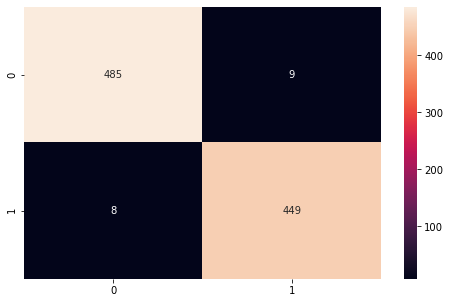

In [234]:
conf_matrix(autoML_model)

In [235]:
class_report(autoML_model)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       494
           1       0.98      0.98      0.98       457

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



In [236]:
tp(autoML_model, "Auto ML")

TP, FN, TP, FP Overall Accuarcy of Auto ML: 98.2124079915878%
Sensitivity Accuarcy of Auto ML: 98.24945295404814%
Specificity Negative Rate Accuarcy of Auto ML: 98.17813765182186%
Negative predictive value Accuarcy of Auto ML: 98.37728194726166%
Fall out Accuarcy of Auto ML: 1.8218623481781375%
False negative rate Accuarcy of Auto ML: 1.75054704595186%
False discovery rate Accuarcy of Auto ML: 1.9650655021834063%
